In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# task 1

In [14]:
img = cv2.imread('Z:/20XW97-CV-LAB/assets/images/cameraman.tif', 0)

In [15]:
# robert
gx = np.array([[1, 0],[0, -1]])
gy = gx.T

In [16]:
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(GX**2+GY**2)
A = np.arctan2(GY,GX)

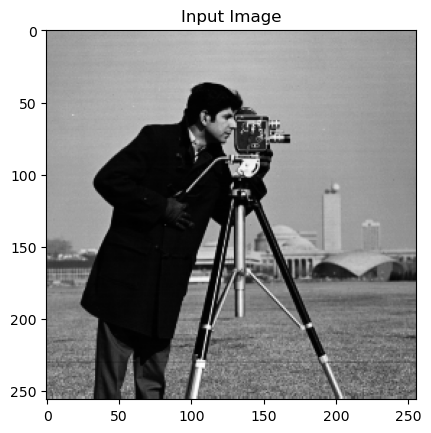

In [17]:
plt.plot(1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')

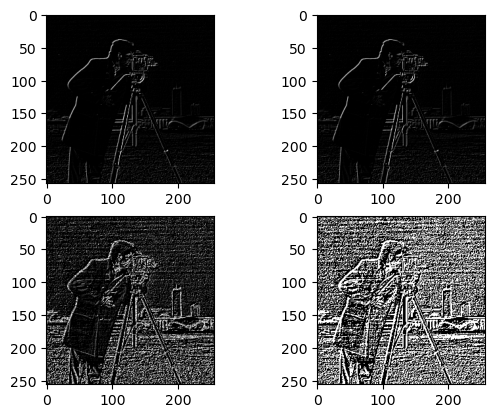

In [18]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

In [19]:
# Prewitt
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = gy.T
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(np.square(GX) + np.square(GY))
A = np.arctan2(GY,GX)

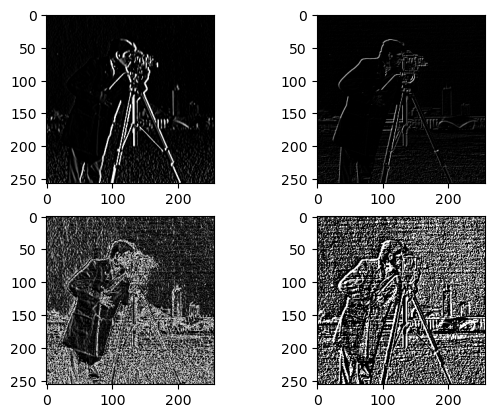

In [20]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

In [21]:
# Sobel
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy = gx.T
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(np.square(GX) + np.square(GY))
A = np.arctan2(GY,GX)

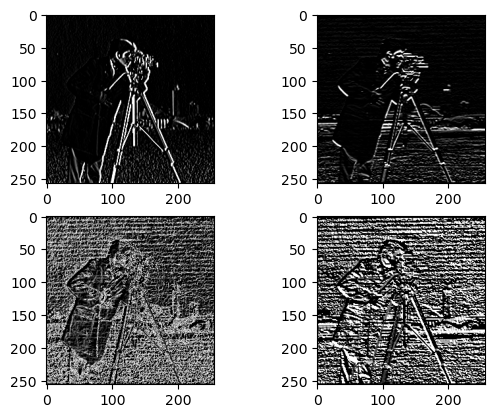

In [22]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

# task2

In [23]:
img = cv2.imread('../assets/images/casablanca.tif')

In [24]:
# Kirsch Compass masks
m1 = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])
m2 = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]])
m3 = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
m6 = np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])
m9 = np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]])
m8 = np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]])
m7 = np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]])
m4 = np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
kirsch = {1:m1, 2:m2, 3:m3, 4:m4, 6:m6, 7:m7, 8:m8, 9:m9}

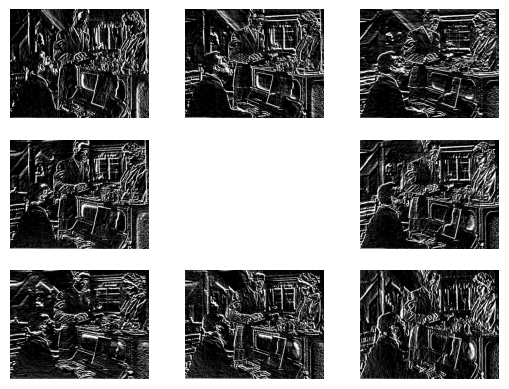

In [25]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.axis('off')
    if i==5:
        plt.plot()
        continue
    plt.imshow(cv2.filter2D(img, -1, kirsch[i]), cmap='gray')


# task3

In [26]:
img = cv2.imread('../assets/images/cameraman.tif', 0)

In [27]:
M, N = img.shape
g_noise = cv2.randn(np.zeros((M, N)).astype(np.uint8), 0, 100)

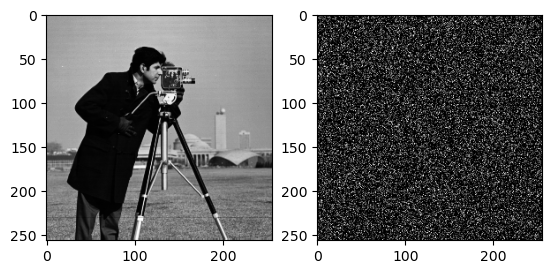

In [28]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(g_noise, cmap='gray')

In [29]:
img_noise = cv2.add(img, g_noise)

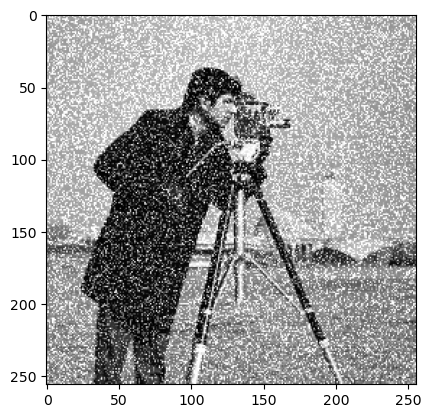

In [30]:
plt.imshow(img_noise, cmap='gray')

In [ ]:
from scipy import ndimage

In [52]:
res = ndimage.gaussian_laplace(img_noise, sigma=2)

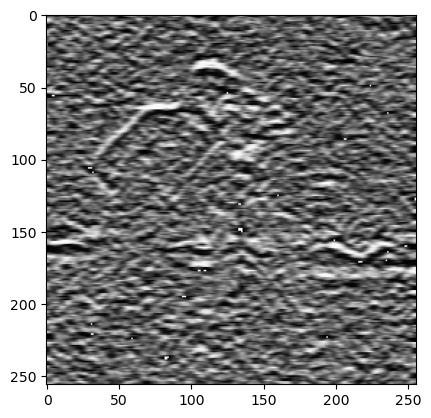

In [53]:
plt.imshow(res)

In [106]:
def LoG(sigma, x, y):
    laplace = -1/(np.pi*sigma**4)*(1-(x**2+y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    return laplace

def LoG_discrete(sigma, n):
    l = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l[i,j] = LoG(sigma, (i-(n-1)/2),(j-(n-1)/2))
    return l

def center(x):
    return (x/LoG(sigma,0,0))

sigma = 0.5
LoG1 = np.round(LoG_discrete(sigma, 3)*center(-4))
LoG2 = np.round(LoG_discrete(sigma, 5)*center(-40))
LoG3 = np.round(LoG_discrete(sigma, 7)*center(-400))
LoG4 = np.round(LoG_discrete(sigma, 9)*center(-777))

In [107]:
LoG1

array([[ 0.,  1.,  0.],
       [ 1., -4.,  1.],
       [ 0.,  1.,  0.]])

In [108]:
img = cv2.filter2D(img_noise, -1, LoG1)

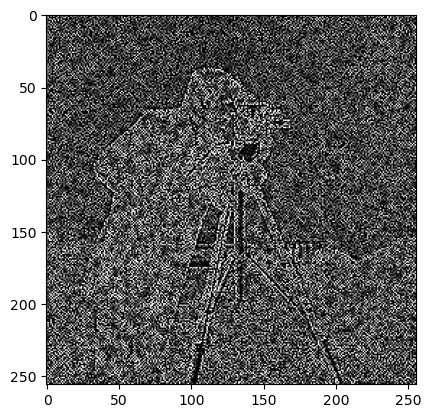

In [109]:
plt.imshow(img, cmap='gray')

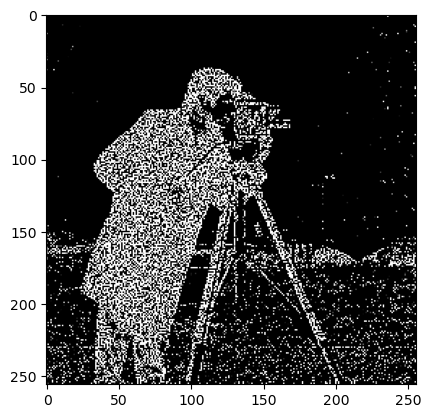

In [110]:
img = cv2.filter2D(img_noise, -1, LoG2)
plt.imshow(img, cmap='gray')

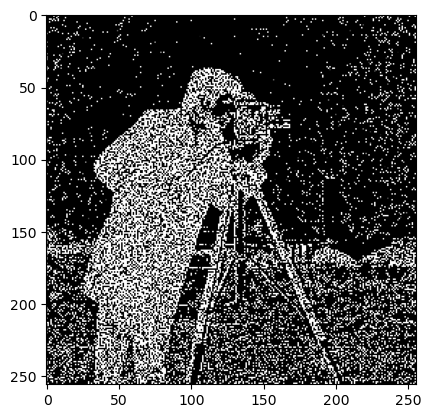

In [111]:
img = cv2.filter2D(img_noise, -1, LoG3)
plt.imshow(img, cmap='gray')

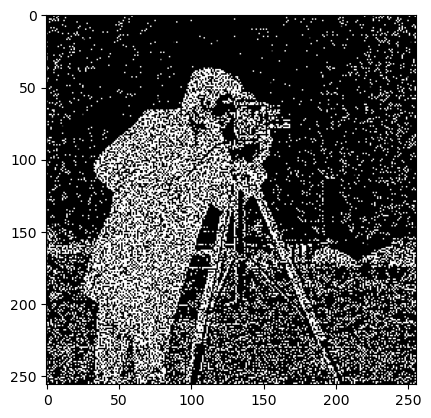

In [112]:
img = cv2.filter2D(img_noise, -1, LoG4)
plt.imshow(img, cmap='gray')

# task4

In [ ]:
# LOG


# task5

In [115]:
img = cv2.imread('../assets/images/cameraman.tif', 0)

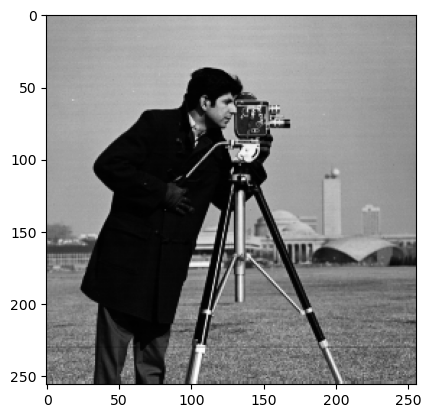

In [116]:
plt.imshow(img)

In [133]:
m, n = img.shape

In [134]:
M = 8
N = 8

In [135]:
tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]